# Лабораторная работа №3 часть 1

## Исследование датасета Iris

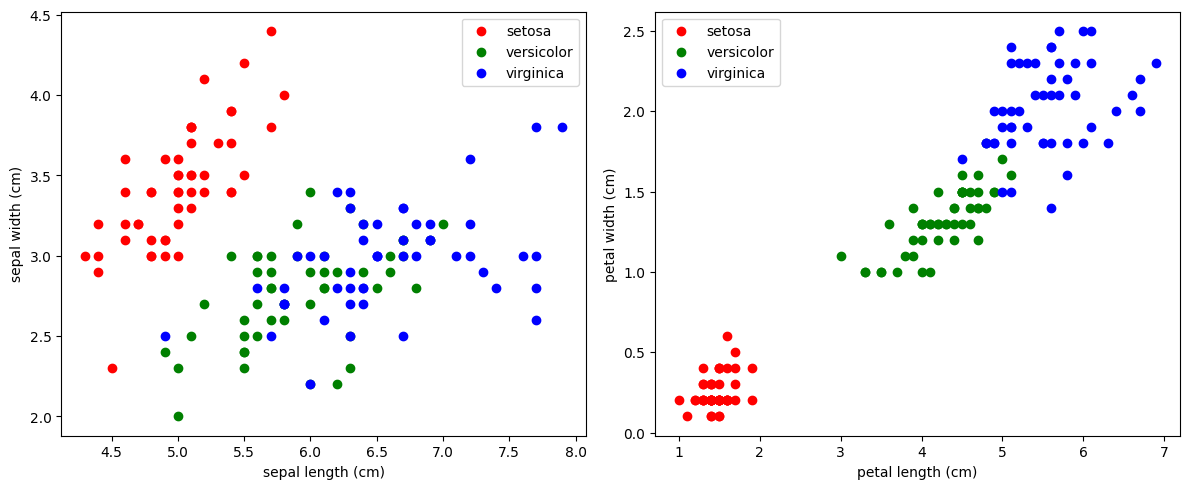

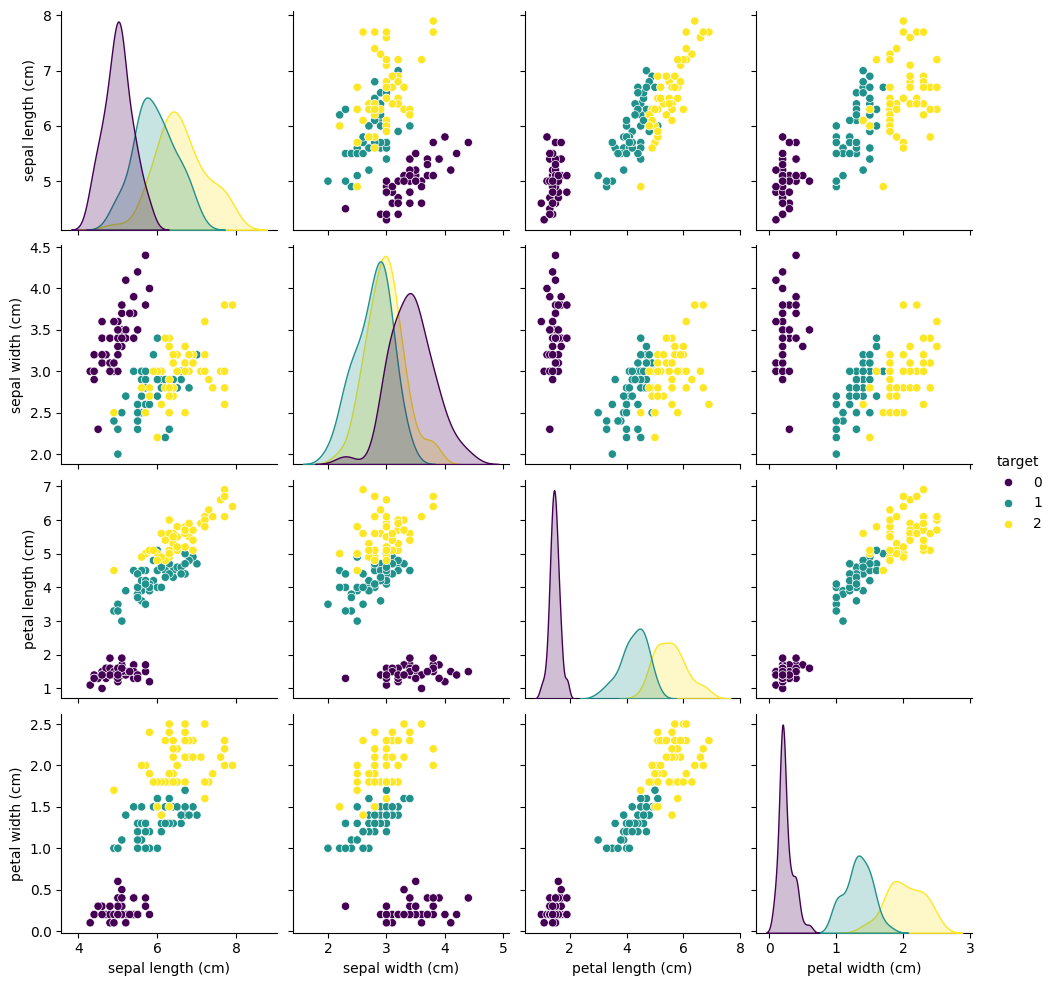

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for target, color in zip([0, 1, 2], ['red', 'green', 'blue']):
    subset = df[df['target'] == target]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], 
                c=color, label=iris.target_names[target])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

plt.subplot(1, 2, 2)
for target, color in zip([0, 1, 2], ['red', 'green', 'blue']):
    subset = df[df['target'] == target]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], 
                c=color, label=iris.target_names[target])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

plt.tight_layout()
plt.show()

sns.pairplot(df, hue='target', palette='viridis')
plt.show()

## подготовка датасетов

In [3]:
# Первый датасет: setosa и versicolor
df1 = df[df['target'].isin([0, 1])].copy()
# Второй датасет: versicolor и virginica
df2 = df[df['target'].isin([1, 2])].copy()

## обучение и оценка моделей для обоиз датасетов

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def train_and_evaluate(df):
    X = df.drop('target', axis=1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

accuracy1 = train_and_evaluate(df1)
print(f"Точность для setosa и versicolor: {accuracy1:.2f}")

accuracy2 = train_and_evaluate(df2)
print(f"Точность для versicolor и virginica: {accuracy2:.2f}")

Точность для setosa и versicolor: 1.00
Точность для versicolor и virginica: 0.93


## генерация датасета и классификация

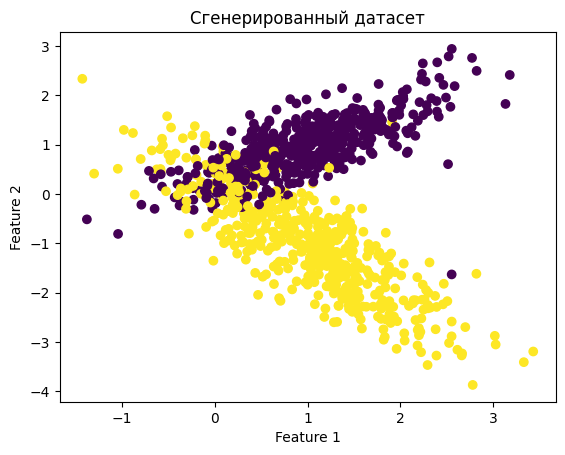

Точность на синтетических данных: 0.94


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                          n_informative=2, random_state=1, n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Сгенерированный датасет')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на синтетических данных: {accuracy:.2f}")

# Из 3_2 задание для 3_1

c:\змея\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


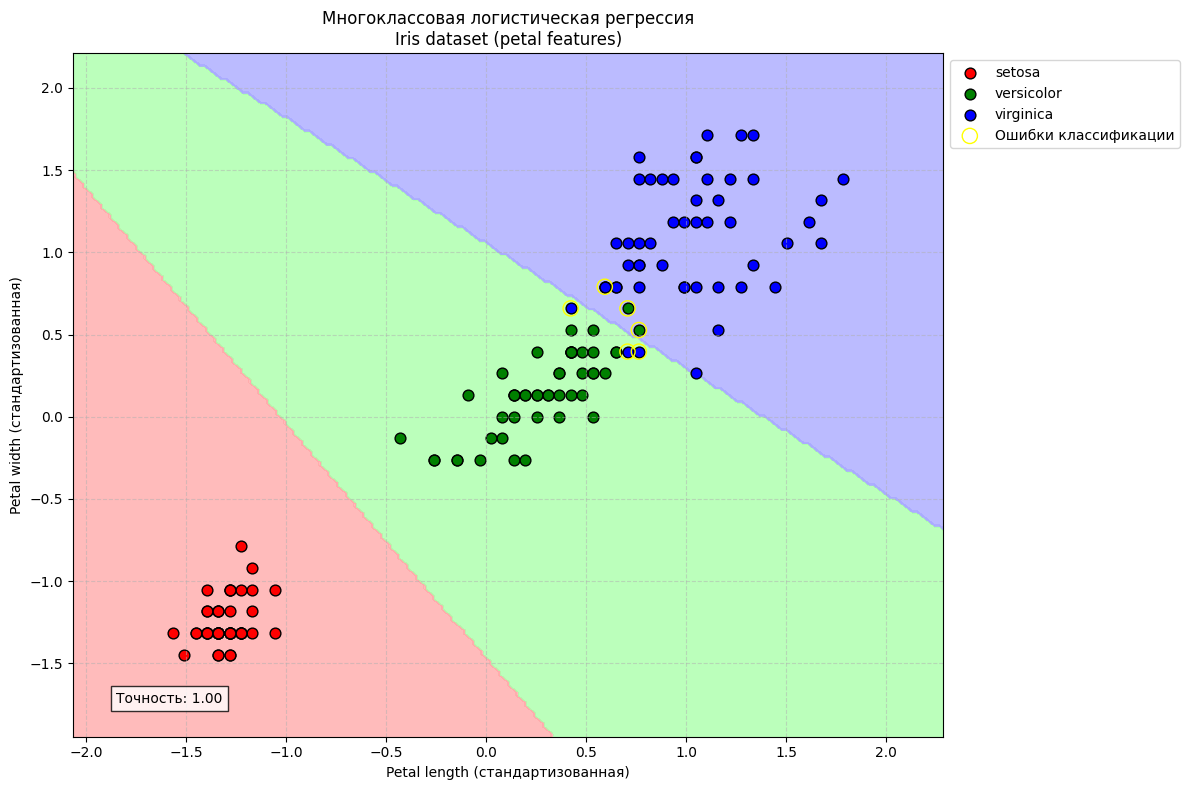

In [12]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np


X = df[['petal length (cm)', 'petal width (cm)']].values
y = df['target'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression(multi_class='multinomial', 
                         solver='lbfgs',
                         random_state=42,
                         max_iter=200) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(12, 8))

x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

colors = ['red', 'green', 'blue']
for i, color in zip([0, 1, 2], colors):
    plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], 
                c=color, label=iris.target_names[i],
                edgecolor='black', s=60)

y_all_pred = model.predict(X_scaled)
errors = (y_all_pred != y)
plt.scatter(X_scaled[errors, 0], X_scaled[errors, 1],
            facecolors='none', edgecolors='yellow', 
            s=120, label='Ошибки классификации')

plt.xlabel('Petal length (стандартизованная)')
plt.ylabel('Petal width (стандартизованная)')
plt.title('Многоклассовая логистическая регрессия\nIris dataset (petal features)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

accuracy = model.score(X_test, y_test)
plt.text(0.05, 0.05, f'Точность: {accuracy:.2f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()